# HR dataset analysis project 


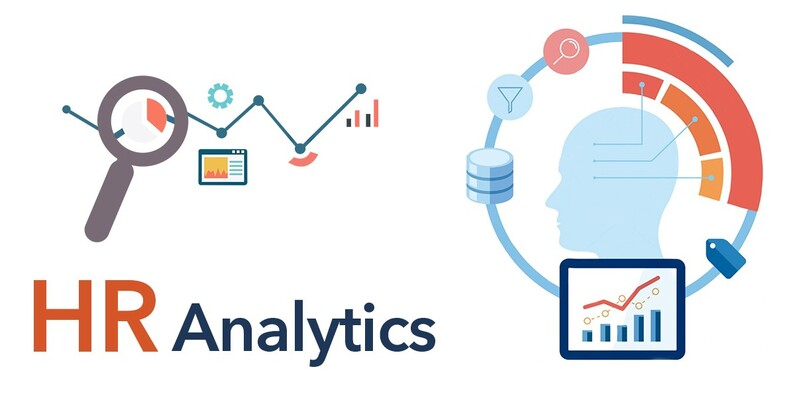

## import the  library's  

In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [101]:
EducationLevel_table = pd.read_csv('EducationLevel.csv')
performance_table=pd.read_csv('PerformanceRating.csv')
Employee_table=pd.read_csv('Employee.csv')
Rating_table=pd.read_csv('RatingLevel.csv')
satisfied_table=pd.read_csv('SatisfiedLevel.csv')

In [102]:
Employee_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [103]:
performance_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


### merging performance table and employee table  

In [104]:
merged_df = Employee_table.merge (performance_table , on="EmployeeID", how="inner")

In [105]:
merged_df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1295,10/30/2016,3,3,2,3,0,4,3,3
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1908,10/30/2017,4,4,5,3,1,2,3,2
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR2617,10/30/2018,5,5,4,3,0,4,5,5
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR3436,10/30/2019,1,3,2,3,1,3,5,4
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR411,10/31/2014,3,4,2,1,0,3,4,3


### We will do performance analysis first   

In [110]:
merged_df["FullName"] = merged_df["FirstName"] + " " + merged_df["LastName"]

# Drop FirstName, LastName, and EmployeeID
merged_df.drop(columns=["FirstName", "LastName", "EmployeeID"], inplace=True)

merged_df.insert(0, 'FullName', merged_df.pop('FullName'))


In [108]:
merged_df['ReviewDate'] = pd.to_datetime(merged_df['ReviewDate'])


In [111]:
print("Performance Rating Trend Analysis")
print("--------------------------------")
print(f"Total reviews: {len(merged_df)}")
print(f"Unique employees: {len(merged_df['FullName'].unique())}")
print(f"Review period: {merged_df['ReviewDate'].min()} to {merged_df['ReviewDate'].max()}")

Performance Rating Trend Analysis
--------------------------------
Total reviews: 6709
Unique employees: 1280
Review period: 2013-01-02 00:00:00 to 2022-12-31 00:00:00


In [ ]:
df_sorted = merged_df.sort_values(['FullName', 'ReviewDate'])# Sort data by employee and review date



In [115]:
# Calculate average ratings by review date
time_based_ratings = merged_df.groupby('ReviewDate').agg({
    'SelfRating': 'mean',
    'ManagerRating': 'mean',
    'FullName': 'count'
}).reset_index()

print("\nOverall Rating Trends:")
print(time_based_ratings)


Overall Rating Trends:
     ReviewDate  SelfRating  ManagerRating  FullName
0    2013-01-02    4.000000       4.000000         1
1    2013-01-03    4.500000       3.500000         2
2    2013-01-04    3.666667       3.000000         3
3    2013-01-08    4.000000       3.000000         1
4    2013-01-10    4.000000       3.000000         2
...         ...         ...            ...       ...
2766 2022-12-26    4.500000       4.000000         2
2767 2022-12-27    4.250000       4.000000         4
2768 2022-12-28    4.500000       4.000000         2
2769 2022-12-29    4.285714       3.714286         7
2770 2022-12-31    4.000000       4.000000         1

[2771 rows x 4 columns]


In [117]:
# Calculate individual employee rating changes
employee_trends = df_sorted.groupby('FullName').agg({
    'SelfRating': ['first', 'last', lambda x: x.iloc[-1] - x.iloc[0]],
    'ManagerRating': ['first', 'last', lambda x: x.iloc[-1] - x.iloc[0]],
    'ReviewDate': ['first', 'last', 'count']
}).round(2)
employee_trends.columns = ['Self_First', 'Self_Last', 'Self_Change',
                         'Manager_First', 'Manager_Last', 'Manager_Change',
                         'First_Review', 'Last_Review', 'Review_Count']

In [118]:
# Calculate improvement statistics
improved_self = (employee_trends['Self_Change'] > 0).sum()
improved_manager = (employee_trends['Manager_Change'] > 0).sum()
total_employees = len(employee_trends)

print("\nPerformance Improvement Statistics:")
print(f"Employees with improved self-ratings: {improved_self} ({improved_self/total_employees:.1%})")
print(f"Employees with improved manager ratings: {improved_manager} ({improved_manager/total_employees:.1%})")


Performance Improvement Statistics:
Employees with improved self-ratings: 351 (27.4%)
Employees with improved manager ratings: 390 (30.5%)


### Visualization 1: Rating Trends Over Time


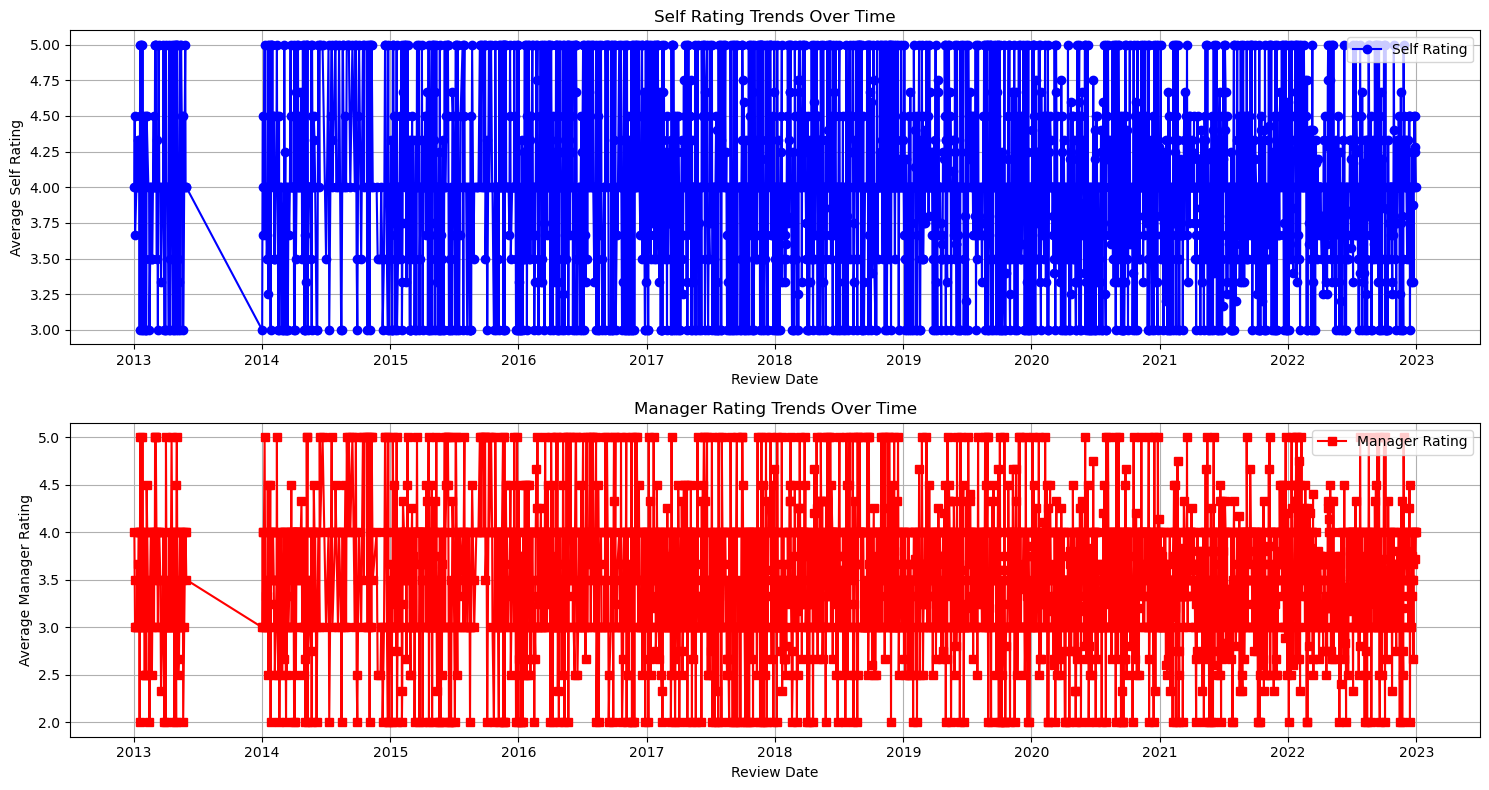

In [ ]:
plt.figure(figsize=(15, 8))

# Subplot 1: Self Rating
plt.subplot(2, 1, 1)
plt.plot(time_based_ratings['ReviewDate'], time_based_ratings['SelfRating'], 
         marker='o', label='Self Rating', color='blue')
plt.title('Self Rating Trends Over Time')
plt.xlabel('Review Date')
plt.ylabel('Average Self Rating')
plt.legend()
plt.grid(True)

# Subplot 2: Manager Rating
plt.subplot(2, 1, 2)
plt.plot(time_based_ratings['ReviewDate'], time_based_ratings['ManagerRating'], 
         marker='s', label='Manager Rating', color='red')
plt.title('Manager Rating Trends Over Time')
plt.xlabel('Review Date')
plt.ylabel('Average Manager Rating')
plt.legend()
plt.grid(True)

plt.tight_layout()  
plt.show()

#### Visualization 2: Distribution of Rating Changes

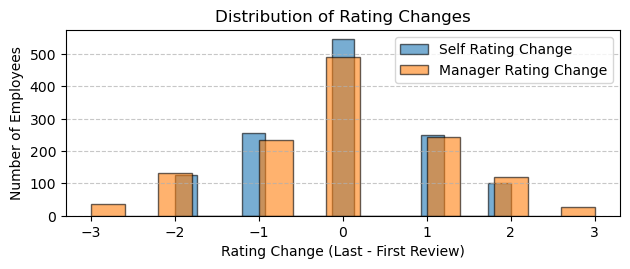

In [124]:
plt.subplot(2, 1, 2)

# Plot histogram directly
plt.hist(employee_trends['Self_Change'], bins=15, alpha=0.6, label='Self Rating Change', edgecolor='black')
plt.hist(employee_trends['Manager_Change'], bins=15, alpha=0.6, label='Manager Rating Change', edgecolor='black')

plt.title('Distribution of Rating Changes')
plt.xlabel('Rating Change (Last - First Review)')
plt.ylabel('Number of Employees')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid lines for readability

plt.tight_layout()  # Adjust layout

In [125]:
# Detailed analysis of rating changes
rating_changes = pd.DataFrame({
    'Self Rating Change': employee_trends['Self_Change'],
    'Manager Rating Change': employee_trends['Manager_Change']
})
print("\nDetailed Rating Changes Analysis:")
print("\nRating Change Statistics:")
print(rating_changes.describe())


Detailed Rating Changes Analysis:

Rating Change Statistics:
       Self Rating Change  Manager Rating Change
count         1280.000000            1280.000000
mean            -0.044531              -0.028125
std              1.049391               1.263856
min             -2.000000              -3.000000
25%             -1.000000              -1.000000
50%              0.000000               0.000000
75%              1.000000               1.000000
max              2.000000               3.000000


In [126]:
# Analysis by number of reviews
review_count_analysis = employee_trends.groupby('Review_Count').agg({
    'Self_Change': ['mean', 'count'],
    'Manager_Change': 'mean'
}).round(3)

print("\nAverage Rating Changes by Number of Reviews:")
print(review_count_analysis)


Average Rating Changes by Number of Reviews:
             Self_Change       Manager_Change
                    mean count           mean
Review_Count                                 
1                  0.000   177          0.000
2                 -0.129   124         -0.032
3                  0.014   148          0.041
4                  0.016   128         -0.047
5                 -0.104   115          0.035
6                  0.010   102          0.059
7                 -0.041   121         -0.132
8                 -0.084   119         -0.092
9                 -0.093   118         -0.127
10                -0.062   128          0.000


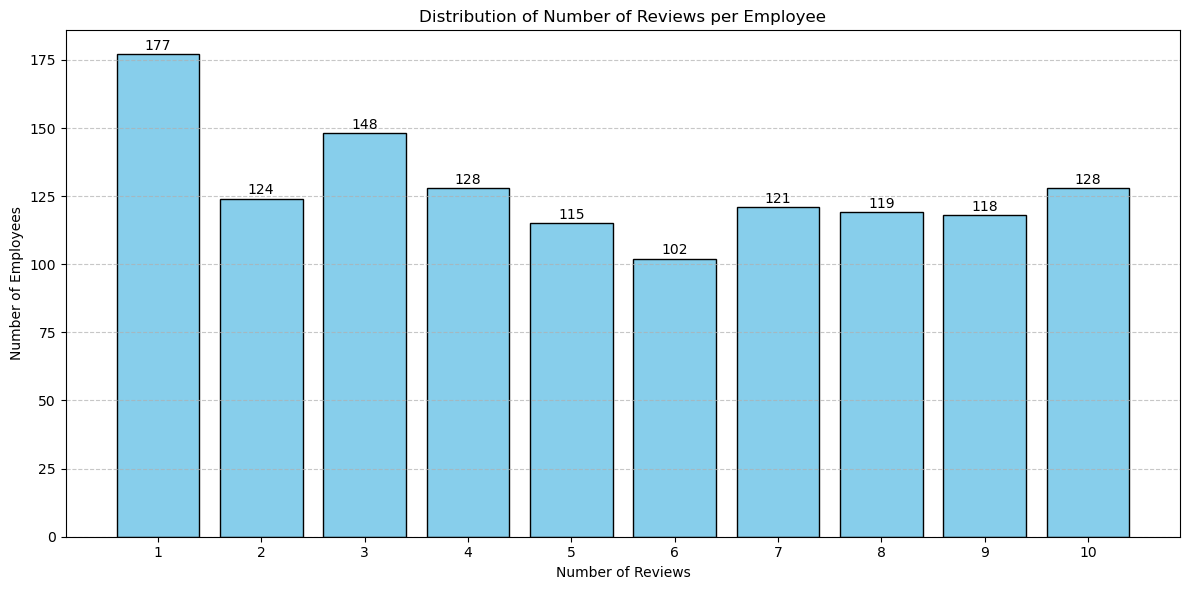

In [128]:
plt.figure(figsize=(12, 6))

# Get counts of review occurrences
review_counts = employee_trends['Review_Count'].value_counts().sort_index()

# Bar chart
plt.bar(review_counts.index, review_counts.values, width=0.8, color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Distribution of Number of Reviews per Employee')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Employees')

# Add value labels above bars
for i, v in enumerate(review_counts):
    plt.text(review_counts.index[i], v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

# Improve readability
plt.xticks(review_counts.index)  # Ensures all review counts appear
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Additional Analysis: Rating Progression


In [129]:
print("\nRating Progression Analysis:")
progression_stats = df_sorted.groupby('FullName').agg({
    'SelfRating': lambda x: x.is_monotonic_increasing,
    'ManagerRating': lambda x: x.is_monotonic_increasing
})

print("\nConsistent Improvement Stats:")
print(f"Employees with consistently improving self-ratings: {progression_stats['SelfRating'].sum()} ({progression_stats['SelfRating'].mean():.1%})")
print(f"Employees with consistently improving manager ratings: {progression_stats['ManagerRating'].sum()} ({progression_stats['ManagerRating'].mean():.1%})")



Rating Progression Analysis:

Consistent Improvement Stats:
Employees with consistently improving self-ratings: 353 (27.6%)
Employees with consistently improving manager ratings: 354 (27.7%)


###  convert education column and rating column to str so we  mapping over them 

In [ ]:
categorical_columns = [
    "Education", "SelfRating", "JobSatisfaction", "EnvironmentSatisfaction", 
    "RelationshipSatisfaction", "ManagerRating", "WorkLifeBalance"
]
merged_df[categorical_columns] = merged_df[categorical_columns].astype(str)

In [ ]:
merged_df.info()

### checking for duplicates 

In [ ]:
merged_df['PerformanceID'].nunique()

### convert hiring date and review date to date type

In [106]:
date_columns = ["HireDate"]
for col in date_columns:
    if col in merged_df.columns:
        merged_df[col] = pd.to_datetime(merged_df[col])

### Update categorical columns with labels


In [ ]:
category_mappings = {
    "Education": {
        "1": "No Formal Qualifications",
        "2": "High School",
        "3": "Bachelors",
        "4": "Masters",
        "5": "Doctorate"
    },
    "SelfRating": {
        "1": "Unacceptable",
        "2": "Needs Improvement",
        "3": "Meets Expectation",
        "4": "Exceeds Expectation",
        "5": "Above and Beyond"
    },
    "WorkLifeBalance": {
        "1": "Unacceptable",
        '2': "Needs Improvement",
        "3": "Meets Expectation",
        "4": "Exceeds Expectation",
        "5": "Above and Beyond"
    },
    "EnvironmentSatisfaction": {
        "1": "Very Dissatisfied",
        "2": "Dissatisfied",
        "3": "Meets Expectation",
        "4": "Exceeds Expectation",
        "5": "Above and Beyond"
    },
    "JobSatisfaction": {
        "1": "Very Dissatisfied",
        "2": "Dissatisfied",
        "3": "Neutral",
        "4": "Satisfied",
        "5": "Very Satisfied"
    },
    "RelationshipSatisfaction": {
        "1": "Very Dissatisfied",
        "2": "Dissatisfied",
        "3": "Neutral",
        "4": "Satisfied",
        "5": "Very Satisfied"
    },
    "ManagerRating": {
        "1": "Unacceptable",
        "2": "Needs Improvement",
        "3": "Meets Expectation",
        "4": "Exceeds Expectation",
        "5": "Above and Beyond"
    }
}

for col, mapping in category_mappings.items():
    merged_df[col] = merged_df[col].map(mapping)

### concat first and last name and drop first employee id  

In [ ]:
merged_df.head()

In [ ]:
merged_df.to_csv("cleaned_data.csv", index=False)

In [ ]:
print("Initial data shape:", merged_df.shape)
print("Number of unique employees:", len(merged_df['FullName'].unique()))
print("Number of total records:", len(merged_df))

### Initial data had 6,709  performance records for only 1,280 unique employees


In [ ]:
reviews_per_employee = merged_df.groupby('FullName').size()
avg_reviews = reviews_per_employee.mean()
min_reviews = reviews_per_employee.min()
max_reviews = reviews_per_employee.max()

print("\nReview Statistics per Employee:")
print(f"Average reviews per employee: {avg_reviews:.2f}")
print(f"Min reviews per employee: {min_reviews}")
print(f"Max reviews per employee: {max_reviews}")
print("\nDistribution of reviews per employee:")
print(reviews_per_employee.value_counts().sort_index())

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_employee, bins=20)
plt.title('Distribution of Reviews per Employee')
plt.xlabel('Number of Reviews')
plt.ylabel('Count of Employees')
plt.tight_layout()
plt.show()

### Each employee had multiple performance reviews (average of 5.2 reviews per employee)

### Get the most recent record for each employee


In [ ]:
merged_df['ReviewDate'] = pd.to_datetime(merged_df['ReviewDate'])

df_latest = merged_df.sort_values('ReviewDate').groupby('FullName').last().reset_index()

print("\nAfter removing duplicates:")
print("Data shape:", df_latest.shape)

### answering the first question 1- Overall attrition rate


In [ ]:
total_employees=len(df_latest)
total_employees_performance = len(Employee_table)
attrition_count = df_latest['Attrition'].value_counts()
attrition_rate = (df_latest['Attrition'] == 'Yes').mean()

print(f"\n1. Attrition Analysis (Based on Most Recent Records):")
print(f"Total employees: {total_employees}")
print(f"Total employees that took performance rating : {total_employees_performance}")
print(f"Attrition count:\n{attrition_count}")
print(f"Attrition rate: {attrition_rate:.2%}")

### Visualization 1: Attrition Distribution Pie Chart


In [ ]:
explode = (0.2,  0)
plt.figure(figsize=(10, 6))
plt.pie(attrition_count,explode=explode, labels=[f'No ({attrition_count["No"]})', f'Yes ({attrition_count["Yes"]})'], 
        autopct='%1.1f%%', colors=['lightgreen', 'Red'], startangle=90, textprops={'fontsize': 14})
plt.title('Overall Attrition Distribution')
plt.show()

### 2. Department-wise attrition

In [ ]:
dept_attrition = df_latest.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
print("\n2. Department-wise Attrition Rates:")
print(dept_attrition['Yes'].sort_values(ascending=False))


In [ ]:
dept_counts = df_latest.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
# Sort by total count descending
dept_counts['Total'] = dept_counts.sum(axis=1)
dept_counts = dept_counts.sort_values('Total', ascending=False).drop('Total', axis=1)
print("\n2. Attrition Analysis by Department:")
dept_counts


In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
dept_counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

# Add count labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.legend(title='Attrition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Job role attrition


In [ ]:
role_counts = df_latest.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
# Sort by total count descending
role_counts['Total'] = role_counts.sum(axis=1)
role_counts = role_counts.sort_values('Total', ascending=False).drop('Total', axis=1)
print("\nJob Role Attrition Rates:")
role_counts

### Visualization 3: Job Role Attrition with counts


In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
role_counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')

# Add count labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.legend(title='Attrition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Demographics visualization with counts


In [ ]:
for demo in ['Gender', 'Ethnicity']:
    demo_counts = df_latest.groupby([demo, 'Attrition']).size().unstack(fill_value=0)
    # Sort by total count descending
    demo_counts['Total'] = demo_counts.sum(axis=1)
    demo_counts = demo_counts.sort_values('Total', ascending=False).drop('Total', axis=1)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    demo_counts.plot(kind='bar', stacked=True, ax=ax)
    plt.title(f'Attrition by {demo}')
    plt.xlabel(demo)
    plt.ylabel('Number of Employees')
    
    # Add count labels on the bars
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    
    plt.legend(title='Attrition')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### 3. Satisfaction correlation with attrition


In [ ]:
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(satisfaction_cols):
    sns.boxplot(x='Attrition', y=col, data=df_latest, ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = ['Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 
                   'RelationshipSatisfaction', 'WorkLifeBalance', 'Attrition']
df_numeric = df_latest.copy()
for col in categorical_cols:
    if col in df_numeric.columns:
        df_numeric[col] = pd.Categorical(df_numeric[col]).codes

correlation_cols = ['Age', 'DistanceFromHome (KM)', 'Salary', 'YearsAtCompany',
                   'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'StockOptionLevel',
                   'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken']
correlation_cols.extend(categorical_cols)

correlation_matrix = df_numeric[correlation_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Key Metrics (Most Recent Records)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 6. Overtime and Attrition with counts


In [ ]:
overtime_counts = df_latest.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)
# Sort by total count descending
overtime_counts['Total'] = overtime_counts.sum(axis=1)
overtime_counts = overtime_counts.sort_values('Total', ascending=False).drop('Total', axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
overtime_counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Attrition by Overtime Status')
plt.xlabel('Overtime')
plt.ylabel('Number of Employees')

# Add count labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

### 7. Salary Distribution


In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='JobRole', y='Salary', hue='Attrition', data=df_latest)
plt.title('Salary Distribution by Job Role and Attrition (Most Recent Records)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### 8. Years at Company Distribution


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df_latest)
plt.title('Years at Company vs Attrition (Most Recent Records)')
plt.tight_layout()

### 9. Stock Option Level Analysis

In [ ]:
print("\n9. Stock Option Level Analysis:")

# Calculate counts and percentages
stock_counts = df_latest.groupby(['StockOptionLevel', 'Attrition']).size().unstack(fill_value=0)
stock_percentages = df_latest.groupby('StockOptionLevel')['Attrition'].value_counts(normalize=True).unstack()
total_by_level = df_latest['StockOptionLevel'].value_counts().sort_index()

# Print detailed analysis
print("\nDetailed Stock Option Level Statistics:")
for level in sorted(df_latest['StockOptionLevel'].unique()):
    total = total_by_level[level]
    attrition_count = stock_counts.loc[level, 'Yes']
    attrition_rate = stock_percentages.loc[level, 'Yes'] * 100
    print(f"\nStock Option Level {level}:")
    print(f"Total Employees: {total}")
    print(f"Employees who left: {attrition_count}")
    print(f"Attrition Rate: {attrition_rate:.1f}%")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot with counts
stock_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Employee Count by Stock Option Level')
ax1.set_xlabel('Stock Option Level')
ax1.set_ylabel('Number of Employees')

# Add count labels on the bars
for c in ax1.containers:
    ax1.bar_label(c, label_type='center')

# Percentage plot
attrition_pct = stock_percentages['Yes'] * 100
ax2.bar(range(len(attrition_pct)), attrition_pct)
ax2.set_title('Attrition Rate by Stock Option Level')
ax2.set_xlabel('Stock Option Level')
ax2.set_ylabel('Attrition Rate (%)')
ax2.set_xticks(range(len(attrition_pct)))
ax2.set_xticklabels(attrition_pct.index)

# Add percentage labels on the bars
for i, v in enumerate(attrition_pct):
    ax2.text(i, v, f'{v:.1f}%\n(n={stock_counts.iloc[i]["Yes"]})', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()  

# Original print statement for consistency
print("\nStock Option Level vs Attrition (Percentage):")
print(stock_percentages['Yes'].sort_values(ascending=False) * 100)

### 10. How many training opportunities are offered, and what is the uptake rate by
 ### employees? Is there a correlation between training taken and attrition?

In [ ]:
training_stats = df_latest.groupby('Attrition').agg({
    'TrainingOpportunitiesWithinYear': ['mean', 'min', 'max'],
    'TrainingOpportunitiesTaken': ['mean', 'min', 'max']
}).round(2)

# Calculate uptake rate
df_latest['UptakeRate'] = (df_latest['TrainingOpportunitiesTaken'] / 
                          df_latest['TrainingOpportunitiesWithinYear'] * 100)

# Print detailed analysis
print("\nTraining Statistics by Attrition Status:")
print(training_stats)

print("\nOverall Training Uptake Rate:")
print(f"Average Uptake Rate: {df_latest['UptakeRate'].mean():.1f}%")
print(f"Median Uptake Rate: {df_latest['UptakeRate'].median():.1f}%")




# Additional analysis: Training uptake rate categories
df_latest['UptakeCategory'] = pd.cut(df_latest['UptakeRate'], 
                                    bins=[0, 25, 50, 75, 100],
                                    labels=['0-25%', '26-50%', '51-75%', '76-100%'])

uptake_attrition = df_latest.groupby('UptakeCategory')['Attrition'].value_counts(normalize=True).unstack()
uptake_counts = df_latest.groupby('UptakeCategory').size()

# Create visualization for uptake categories
plt.figure(figsize=(10, 6))
ax = uptake_attrition['Yes'].plot(kind='bar')
plt.title('Attrition Rate by Training Uptake Category')
plt.xlabel('Training Uptake Rate')
plt.ylabel('Attrition Rate (%)')

# Add percentage and count labels
for i, v in enumerate(uptake_attrition['Yes']):
    count = uptake_counts[i]
    plt.text(i, v, f'{v*100:.1f}%\n(n={count})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print correlation analysis
correlation = df_latest['TrainingOpportunitiesTaken'].corr(df_latest['UptakeRate'])
print(f"\nCorrelation between Training Taken and Uptake Rate: {correlation:.2f}")

# Print uptake rate analysis
print("\nAttrition Rate by Training Uptake Category:")
for category in uptake_attrition.index:
    count = uptake_counts[category]
    attrition_rate = uptake_attrition.loc[category, 'Yes'] * 100
    print(f"\n{category}:")
    print(f"Total Employees: {count}")
    print(f"Attrition Rate: {attrition_rate:.1f}%")